In [6]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

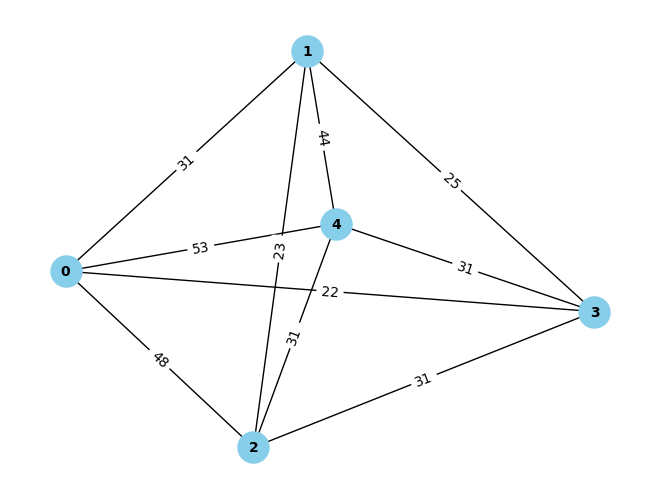

In [12]:
# Load adjacency matrix from CSV
adjacency_matrix_file = r'districting_2020\RI\counties\graph\RI_distances.csv'
adjacency_matrix_df = pd.read_csv(adjacency_matrix_file, index_col=0)

# Convert DataFrame to numpy array
adjacency_matrix = adjacency_matrix_df.to_numpy()

# Create a graph object
G = nx.from_numpy_array(adjacency_matrix)

# Draw the graph
pos = nx.spring_layout(G)  # Positions nodes using Fruchterman-Reingold force-directed algorithm
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [28]:
RI_population = "districting_2020/RI/counties/graph/RI.population"

In [29]:
# Open the file and read its contents
with open(RI_population, 'r') as file:
    # Read the total population from the first line
    total_population_line = next(file).strip()  # Removes newline character at the end
    total_population = int(total_population_line.split('=')[1].strip())
    
    # Initialize a dictionary to store the rest of the data
    data = {}
    
    # Iterate over the remaining lines
    for line in file:
        # Each line is expected to have two values, separated by a space
        key, value = line.strip().split()  # Split by whitespace
        data[int(key)] = int(value)  # Convert both to integers and store in the dictionary

# Print the results to verify
total_population, data

(1097379, {0: 660741, 1: 50793, 2: 85643, 3: 170363, 4: 129839})

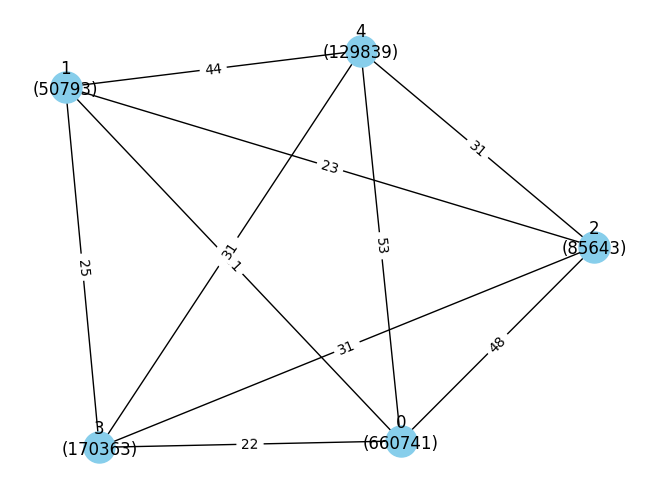

In [32]:
population_data: {0: 660741, 1: 50793, 2: 85643, 3: 170363, 4: 129839}
adjacency_matrix = adjacency_matrix_df.to_numpy()
G = nx.from_numpy_array(adjacency_matrix)
pos = nx.spring_layout(G)

# Your dictionary with the population data (replace this with your actual data)
population_data = {0: 660741, 1: 50793, 2: 85643, 3: 170363, 4: 129839}

# Update the labels with the population data
for node in G.nodes():
    G.nodes[node]['population'] = population_data[node]

# Draw the graph
nx.draw(G, pos, with_labels=False, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
label_pos = {k: [v[0], v[1] + 0.03] for k, v in pos.items()}  # This offsets the labels slightly above the nodes
labels = {node: f"{node}\n({G.nodes[node]['population']})" for node in G.nodes()}
nx.draw_networkx_labels(G, label_pos, labels=labels)

# Assuming you have edge weights you want to display
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()